# Example of Count Vectorizer

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
sentences= ["The only cool a Washington is a DC", 
             "A cool a city in  the Washington is Seattle",
             "Moses Lake is the in a Washington"]

vectorizer = CountVectorizer()
bagofwords = vectorizer.fit_transform(sentences).todense()
bagofwords

matrix([[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
        [1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]])

In [4]:
vectorizer.vocabulary_

{'the': 9,
 'only': 7,
 'cool': 1,
 'washington': 10,
 'is': 4,
 'dc': 2,
 'city': 0,
 'in': 3,
 'seattle': 8,
 'moses': 6,
 'lake': 5}

# Analyze Product Sentiment

# Read product review data

In [5]:
products = pd.read_csv('./amazon_baby.csv')

# Explore data

In [6]:
products

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183213 non-null  object
 1   review  182702 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


## Remove rows with no reviews

In [8]:
products = products.dropna()

## Remove duplicates

In [9]:
products = products.drop_duplicates()

In [10]:
products.describe()

,rating
count,182382.000000
mean,4.119178
std,1.285362
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Most-reviewed product

In [11]:
products['name'].value_counts()[:10]

Vulli Sophie the Giraffe Teether                                            779
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                         560
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision    558
Baby Einstein Take Along Tunes                                              545
Cloud b Twilight Constellation Night Light, Turtle                          517
Fisher-Price Booster Seat, Blue/Green/Gray                                  487
Fisher-Price Rainforest Jumperoo                                            446
Graco Nautilus 3-in-1 Car Seat, Matrix                                      418
Leachco Snoogle Total Body Pillow                                           388
Regalo Easy Step Walk Thru Gate, White                                      372
Name: name, dtype: int64

# Examine the reivews for the most-reviewed product

In [12]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [13]:
giraffe_reviews

,name,review,rating
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5
...,...,...,...
159649,Vulli Sophie the Giraffe Teether,My baby loves her Sophie Chew Toy. She can che...,5
159650,Vulli Sophie the Giraffe Teether,Sophie the Giraffe was a big hit at the baby s...,5
159651,Vulli Sophie the Giraffe Teether,quick shipping and perfect product. I would pu...,5
159652,Vulli Sophie the Giraffe Teether,My baby who is currently teething love his Sop...,5


In [14]:
len(giraffe_reviews)

779

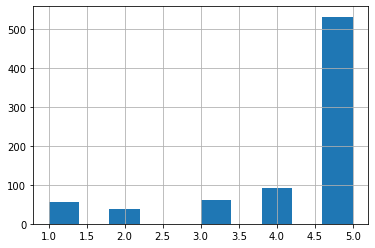

In [15]:
giraffe_reviews['rating'].hist();

# Building a sentiment classifier

## Build Bag of Words, tf-idf vector for each reviews

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

tf_vec = Pipeline([
    ('count_vec', CountVectorizer()),
    ('ft_trans', TfidfTransformer())
])

bag_of_words = tf_vec.fit_transform(products['review'])

In [17]:
bag_of_words.shape

(182382, 67943)

In [18]:
tf_vec.transform(products.loc[0,['review']]).todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

# Define what is positive and negative sentiment

In [19]:
#positive sentiment = 3-star, 4-star or 5-star reviews
products['sentiment'] = products['rating'] >= 3

In [20]:
products['sentiment'].shape[0]

182382

In [21]:
products['sentiment'].value_counts()

True     156021
False     26361
Name: sentiment, dtype: int64

In [22]:
products['sentiment'] = products['sentiment'].values.astype('int')

In [23]:
products['sentiment'].value_counts()

1    156021
0     26361
Name: sentiment, dtype: int64

# Train our sentiment classifier

In [24]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(bag_of_words, products['sentiment'], test_size=.2, random_state=0)

In [25]:
train_data.shape

(145905, 67943)

In [26]:
train_target.shape

(145905,)

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(train_data, train_target)

/home/osama/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# Apply the sentiment classifier to better understand the Giraffe reviews

In [28]:
target_pred = clf.predict_proba(bag_of_words)

In [29]:
target_pred[:10, 1]

array([0.86171486, 0.86326955, 0.98948425, 0.98631043, 0.96408448,
       0.98874505, 0.87001345, 0.99252856, 0.96240348, 0.88312382])

In [30]:
products['predicted sentiment'] = target_pred[:, 1]

In [31]:
giraffe_reviews = products[products['name']== 'Vulli Sophie the Giraffe Teether']

In [32]:
giraffe_reviews

,name,review,rating,sentiment,predicted sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,1,0.997047
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,1,0.999617
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,0,0.662364
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,1,0.929090
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,1,0.506556
...,...,...,...,...,...
159649,Vulli Sophie the Giraffe Teether,My baby loves her Sophie Chew Toy. She can che...,5,1,0.997040
159650,Vulli Sophie the Giraffe Teether,Sophie the Giraffe was a big hit at the baby s...,5,1,0.920714
159651,Vulli Sophie the Giraffe Teether,quick shipping and perfect product. I would pu...,5,1,0.999727
159652,Vulli Sophie the Giraffe Teether,My baby who is currently teething love his Sop...,5,1,0.999419


# Sort the Giraffe reviews according to predicted sentiment

In [33]:
giraffe_reviews = giraffe_reviews.sort_values(by='predicted sentiment', ascending=False)

In [34]:
giraffe_reviews.head()

,name,review,rating,sentiment,predicted sentiment
34814,Vulli Sophie the Giraffe Teether,We love Sophie at our house... she is a great ...,5,1,0.999966
34497,Vulli Sophie the Giraffe Teether,Absolutely wonderful product! The baby loves i...,5,1,0.999956
34848,Vulli Sophie the Giraffe Teether,Love it! Love it! Love it! The best teether I...,5,1,0.999933
35042,Vulli Sophie the Giraffe Teether,My daughter is 6 months and she loves this. Ve...,5,1,0.999933
34830,Vulli Sophie the Giraffe Teether,Our daughter loves this teether. It goes every...,5,1,0.999887


In [35]:
giraffe_reviews.tail()

,name,review,rating,sentiment,predicted sentiment
34649,Vulli Sophie the Giraffe Teether,"Very disappointed upon arrival, it resembles a...",1,0,0.030321
34630,Vulli Sophie the Giraffe Teether,It\'s really terrible. When my 4 months daught...,1,0,0.018319
34706,Vulli Sophie the Giraffe Teether,Totally overpriced for what it is. Go to Pets...,1,0,0.009042
34956,Vulli Sophie the Giraffe Teether,I was very excited getting this product but my...,2,0,0.007395
34732,Vulli Sophie the Giraffe Teether,Received the product and smells like cheap rub...,1,0,0.003451


## Show the most positive reviews

In [36]:
print(giraffe_reviews.iloc[0, 1])

We love Sophie at our house... she is a great teether and a great toy for entertainment.  Our 18 month old still loves her.  She is the perfect size for gripping and holding and biting... she is natural which is great too... and she is SO cute!


In [37]:
giraffe_reviews.iloc[1, 1]

'Absolutely wonderful product! The baby loves it so we love it! Sophie is the best investment we have made so far!'

# Most negative reivews

In [38]:
giraffe_reviews.iloc[-1, 1]

'Received the product and smells like cheap rubber. This is biggest waste of money. I even soaked it in hot water with soap for couple of hours (over a couple of days) but still smells. I ended up tossing this as this was waste of money.'

In [39]:
giraffe_reviews.iloc[-2, 1]

'I was very excited getting this product but my son was not interested in it in the least.  Very disappointed.  I will not recommend this product to anyone not to mention the price for it is ridiculous.'

# Evaluate sentiment model

In [40]:
from sklearn.metrics import classification_report

test_pred = clf.predict(test_data)
print(classification_report(test_target, test_pred))


              precision    recall  f1-score   support

           0       0.79      0.57      0.66      5212
           1       0.93      0.98      0.95     31265

    accuracy                           0.92     36477
   macro avg       0.86      0.77      0.81     36477
weighted avg       0.91      0.92      0.91     36477



In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_target, test_pred)

array([[ 2956,  2256],
       [  778, 30487]])

## The majority class classifier accuracy
**Which is the base line accuracy**<br><br>
= *no. majority class / no. of examples*

In [42]:
27976/33304

0.8400192169108815

# sentiment_model accuracy on test set is 0.92

In [43]:
test_pred_proba = clf.predict_proba(test_data)

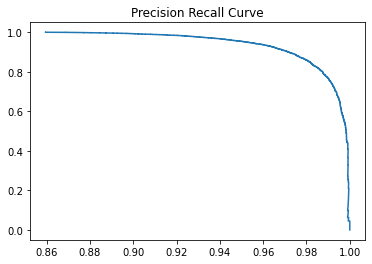

In [44]:
import matplotlib.pyplot as plt
# inline
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(test_target, test_pred_proba[:,1])
plt.plot(precision, recall);
plt.title('Precision Recall Curve');

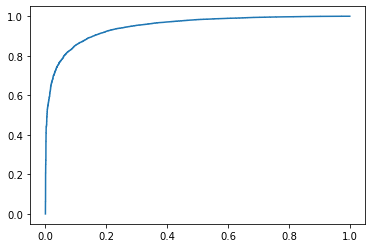

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_target, test_pred_proba[:,1])
plt.plot(fpr, tpr);

<br>


# We want to improve the recall (accuracy of predicting the positive class) we sacrifice precision and vice versa 
# Look at precision-recall curve

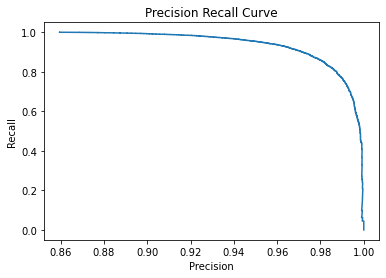

In [47]:
import matplotlib.pyplot as plt
# inline
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(test_target, test_pred_proba[:,1])
plt.plot(precision, recall);
plt.title('Precision Recall Curve');
plt.xlabel('Precision')
plt.ylabel('Recall');

# We change the classification to have 0.99 recall

In [69]:
index = np.where(recall <= 0.99)[0][0]
threshold_99_recall = thresholds[index]

In [70]:
test_pred_99_recall = test_pred_proba[:,1] > threshold_99_recall

In [73]:
from sklearn.metrics import classification_report

print(classification_report(test_target, test_pred_99_recall))

              precision    recall  f1-score   support

           0       0.87      0.39      0.54      5212
           1       0.91      0.99      0.95     31265

    accuracy                           0.90     36477
   macro avg       0.89      0.69      0.74     36477
weighted avg       0.90      0.90      0.89     36477



In [74]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_target, test_pred_99_recall)

array([[ 2026,  3186],
       [  313, 30952]])

# Now our classifier classify positve reviews with 99% accuracy

# Lets try SVM Classifier

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(train_data, train_target)

In [ ]:
from sklearn.metrics import classification_report

test_pred = clf.predict(test_data)
print(classification_report(test_target, test_pred))
